# Machine Learning Lab 1

## Assignment 3 (Deadline : 29/10/2020 11:59PM)

Total Points : 100

In [440]:
import numpy as np
np.random.seed(42)  # setting random seed for reproducibility

### 1. Digit Classification : 8 vs others (40 points)

In [441]:
# Import the required libraries

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import sklearn.metrics 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [442]:
# The digits data can be loaded as follows :
from sklearn import datasets
D = datasets.load_digits()
X, y = D["data"], D["target"]
y_new = np.copy(y)
y_new[y_new != 8] = 0
y_new[y_new != 0] = 1

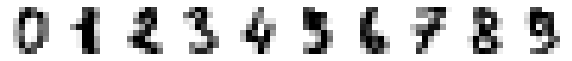

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 0 1 0]


In [443]:
# Plot a few digits to get a sense of how the data looks like
for i in range(10):
    plt.figure(1, figsize=(10, 10))
    plt.subplot(1,10,i+1)
    plt.imshow(D.images[i], cmap= plt.cm.binary, interpolation='nearest')
    plt.axis('off')
    
plt.show()
print(y[:10])
print(y_new[:10])

In [444]:
# Create a 2-class classification problem (digit 8 versus other digits)
# 20% for testing and rest for training

X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = .2, random_state = 42)

In [445]:
# Train a logistic regression model with no regularisation for the problem and obtain the cross validation accuracies

model = LogisticRegression(penalty = 'none', max_iter = 7500, solver = 'saga')
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7500,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [446]:
# Predict values for the test set using the model obtained above 

y_pred = model.predict(X_test)
y_pred_total = model.predict(X)

In [447]:
# Obtain all the different performance metrics for the model on the test set


print(model.score(X_test, y_test))
sklearn.metrics.confusion_matrix(y_test, y_pred,labels=None, sample_weight=None, normalize=None)


0.9694444444444444


array([[325,   5],
       [  6,  24]], dtype=int64)

In [448]:
cross_val_score(model, X , y_new, cv = 3, scoring = 'accuracy')

array([0.94490818, 0.94156928, 0.93489149])

In [449]:
y_pred1 = cross_val_predict(l1_model, X, y_new, cv=3)
print(y_pred_l1c[:10])

[0 0 0 0 0 0 0 0 1 0]


In [450]:
P_Score=precision_score(y_new, y_pred1)
print("Precision score",P_Score)

R_Score=recall_score(y_new ,y_pred1)
print("Recall Score",R_Score)

F1_Score=f1_score(y_new, y_pred1)
print("F1 Score",F1_Score)

Precision score 0.702247191011236
Recall Score 0.7183908045977011
F1 Score 0.7102272727272726


In [451]:
print('mean square error : ', mean_squared_error(y_test, y_pred))

mean square error :  0.030555555555555555


In [452]:
print(' root mean square error : ', np.sqrt(mean_squared_error(y_test, y_pred)))

 root mean square error :  0.17480147469502524


In [453]:
print('mean absolute error : ', mean_absolute_error(y_test, y_pred))

mean absolute error :  0.030555555555555555


### L1 model

In [454]:
# Change the hyperparameters of the model and see what effect it has on the model
# Find the hyperparameters which maximises the model performance. Choose the right performance metric to evaluate the model

#keeping everything the same except penalty

l1_model =LogisticRegression(penalty="l1", random_state=0, max_iter=7000, solver='saga')

l1_model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [455]:
y_pred_l1 = l1_model.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, y_pred_l1, labels=None, sample_weight=None, normalize=None)

array([[326,   4],
       [  6,  24]], dtype=int64)

In [456]:
cross_val_score(l1_model, X, y_new, cv=3, scoring="accuracy")

array([0.93989983, 0.94991653, 0.93989983])

In [457]:
y_pred_l1c = cross_val_predict(l1_model, X, y_new, cv=3)
print(y_pred_l1c[:10])

[0 0 0 0 0 0 0 0 1 0]


In [458]:
sklearn.metrics.confusion_matrix(y_test, y_pred_l1, labels=None, sample_weight=None, normalize=None)

p_score_l1= precision_score(y_new ,y_pred_l1c)
print("Precision score :", p_score_l1)

r_score_l1 = recall_score(y_new ,y_pred_l1c)
print("Recall score :", r_score_l1)

f1_score_l1 = f1_score(y_new ,y_pred_l1c)
print("F1 score :", f1_score_l1)

Precision score : 0.702247191011236
Recall score : 0.7183908045977011
F1 score : 0.7102272727272726


In [459]:
alpha_list = [.003, .01, .03, .1, .3, 1, 3]
cross_val = list(range(7))
for i in list(range(7)):
    l1_1_model =LogisticRegression(penalty="l1", C = alpha_list[i], random_state=0, max_iter=3000, solver='saga')
    cross_val[i] = cross_val_score(l1_1_model, X , y_new, cv = 2, scoring = 'accuracy')

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


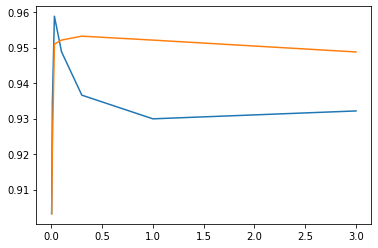

In [460]:
plt.plot(alpha_list, cross_val)
plt.show()

### L2 model

In [461]:
l2_model =LogisticRegression(penalty="l2", random_state=0, max_iter=7000, solver='saga')

l2_model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [462]:
y_pred_l2 = l2_model.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, y_pred_l2, labels=None, sample_weight=None, normalize=None)

array([[326,   4],
       [  6,  24]], dtype=int64)

In [463]:
y_pred_l2c = cross_val_predict(l2_model, X, y_new, cv=3)
print(y_pred_l1c[:10])

[0 0 0 0 0 0 0 0 1 0]


In [464]:
p_score_l2= precision_score(y_new ,y_pred_l2c)
print("Precision score :", p_score_l2)

r_score_l2 = recall_score(y_new ,y_pred_l2c)
print("Recall score :", r_score_l2)

f1_score_l2 = f1_score(y_new ,y_pred_l2c)
print("F1 score :", f1_score_l2)

Precision score : 0.6910112359550562
Recall score : 0.7068965517241379
F1 score : 0.6988636363636364


In [465]:
cross_val_score(l2_model, X , y_new, cv = 3, scoring = 'accuracy')

array([0.93989983, 0.94657763, 0.93656093])

In [466]:
alpha_list = [ .003, .01, .03, .1, .3, 1, 3]
cross_val = list(range(7))
for i in list(range(7)):
    l1_2_model =LogisticRegression(penalty="l2", C = alpha_list[i], random_state=0, max_iter=2000, solver='saga')
    cross_val[i] = cross_val_score(l1_2_model, X , y_new, cv = 2, scoring = 'accuracy')

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


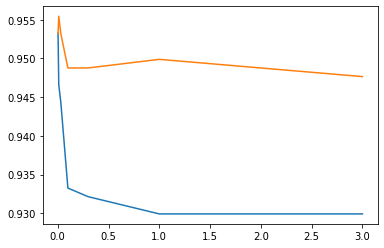

In [467]:
plt.plot(alpha_list, cross_val)
plt.show()

### Elasticnet

In [468]:
el_model =LogisticRegression(penalty="elasticnet",l1_ratio = .5, random_state=0, max_iter=7000, solver='saga')

el_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=7000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [469]:
y_pred_el = el_model.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, y_pred_el, labels=None, sample_weight=None, normalize=None)

array([[326,   4],
       [  6,  24]], dtype=int64)

In [470]:
y_pred_elc = cross_val_predict(el_model, X, y_new, cv=3)
print(y_pred_l1c[:10])

[0 0 0 0 0 0 0 0 1 0]


In [471]:
p_score_el = precision_score(y_new ,y_pred_elc)
print("Precision score :", p_score_el)

r_score_el = recall_score(y_new ,y_pred_elc)
print("Recall score :", r_score_el)

f1_score_el = f1_score(y_new ,y_pred_elc)
print("F1 score :", f1_score_el)

Precision score : 0.6927374301675978
Recall score : 0.7126436781609196
F1 score : 0.7025495750708215


In [472]:
cross_val_score(el_model, X , y_new, cv = 3, scoring = 'accuracy')

array([0.93989983, 0.94824708, 0.93656093])

In [473]:
alpha_list =  [.003, .01, .03, .1, .3, 1]
cross_val = list(range(6))
for i in list(range(6)):
    el_2_model =LogisticRegression(penalty="elasticnet",l1_ratio = .5, C = alpha_list[i], random_state=0, max_iter=2000, solver='saga')
    cross_val[i] = cross_val_score(el_2_model, X , y_new, cv = 2, scoring = 'accuracy')

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


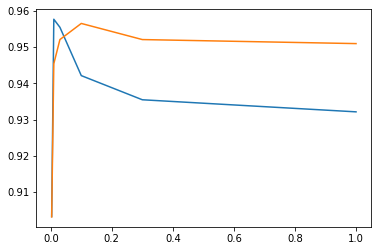

In [474]:
plt.plot(alpha_list, cross_val)
plt.show()

### 2. California Housing Prices (60 points)

In this problem, we will take the same California Housing prices dataset that was shown in the last lab class to do a binary classification of whether the median house value for a given locality is high or low .

In [475]:
# Get the data from the website to the local directory

import os
import tarfile
from six.moves import urllib

source_path = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
local_path = os.path.join("datasets", "housing")

os.makedirs(local_path, exist_ok=True)
tgz_path = os.path.join(local_path, "housing.tgz")

urllib.request.urlretrieve(source_path, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=local_path)
housing_tgz.close()

In [476]:
# Read the data into a dataframe
import pandas as pd

df=pd.read_csv(os.path.join(local_path, "housing.csv"))


In [477]:
# Explore the data to understand it better

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [478]:
df.shape

(20640, 10)

In [479]:
corr = df.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [480]:
df = df.dropna(how='any',axis=0) 

In [481]:
df.shape

(20433, 10)

In [482]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

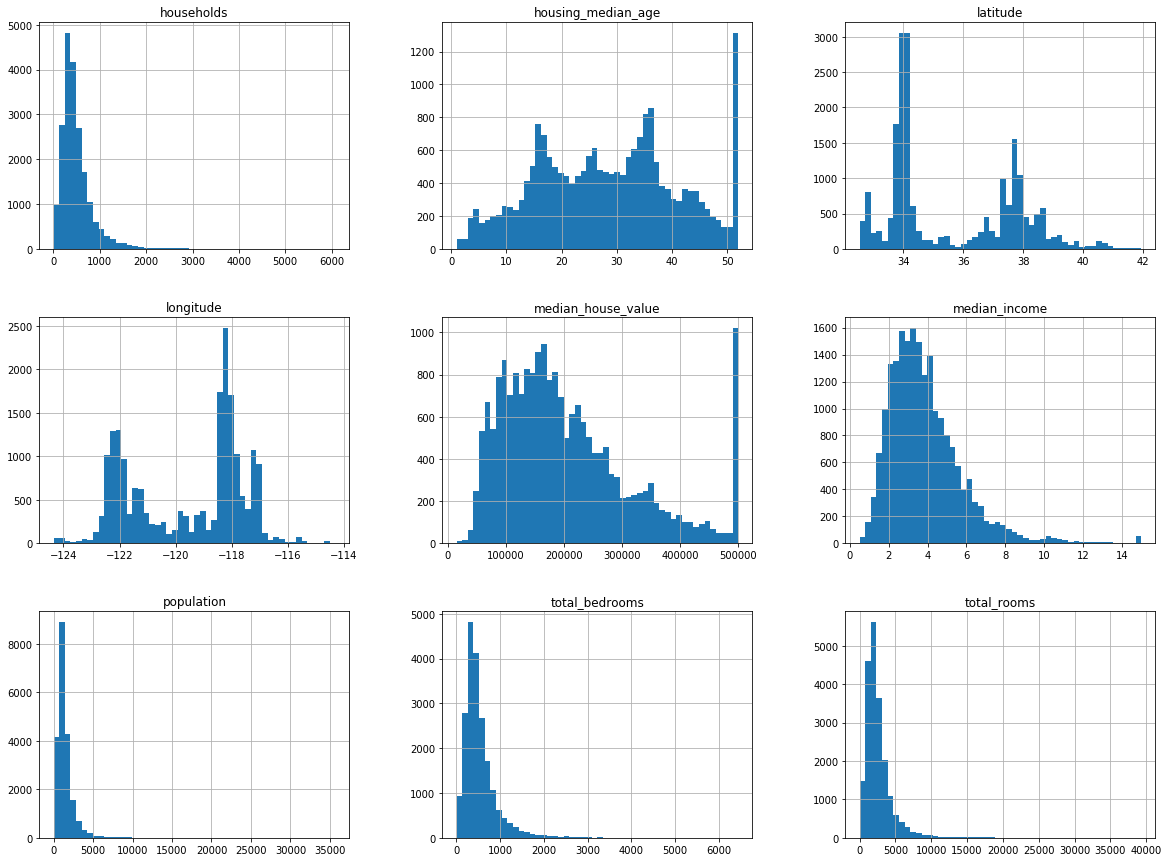

In [483]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [484]:
# Convert the data to suit a binary classification of High Price vs Low Price for the median_house_value column
# Assume that anything >= $200,000 is high price with output value 1 and anything less than that is low price with output value 0.

df['Price'] = df.median_house_value >= 200000
housing_map = {True : 1, False : 0}
df['Price'] = df['Price'].map(housing_map)
df.head(-10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Price
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1
...,...,...,...,...,...,...,...,...,...,...,...
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,0
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND,0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND,0
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,INLAND,0


In [485]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_encoded = ordinal_encoder.fit_transform(df[['ocean_proximity']])
df_encoded[:-10]

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [486]:
df['ocean_proximity'] = df_encoded
df.head(-10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Price
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,1.0,0
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,1.0,0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,1.0,0
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,1.0,0


In [487]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'Price'],
      dtype='object')

In [490]:
X_dataframe = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value',
       'ocean_proximity']]
x_dataframe = X_dataframe.values
x_dataframe[:10]

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01,  8.8000e+02,  1.2900e+02,
         3.2200e+02,  1.2600e+02,  8.3252e+00,  4.5260e+05,  3.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01,  7.0990e+03,  1.1060e+03,
         2.4010e+03,  1.1380e+03,  8.3014e+00,  3.5850e+05,  3.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01,  1.4670e+03,  1.9000e+02,
         4.9600e+02,  1.7700e+02,  7.2574e+00,  3.5210e+05,  3.0000e+00],
       [-1.2225e+02,  3.7850e+01,  5.2000e+01,  1.2740e+03,  2.3500e+02,
         5.5800e+02,  2.1900e+02,  5.6431e+00,  3.4130e+05,  3.0000e+00],
       [-1.2225e+02,  3.7850e+01,  5.2000e+01,  1.6270e+03,  2.8000e+02,
         5.6500e+02,  2.5900e+02,  3.8462e+00,  3.4220e+05,  3.0000e+00],
       [-1.2225e+02,  3.7850e+01,  5.2000e+01,  9.1900e+02,  2.1300e+02,
         4.1300e+02,  1.9300e+02,  4.0368e+00,  2.6970e+05,  3.0000e+00],
       [-1.2225e+02,  3.7840e+01,  5.2000e+01,  2.5350e+03,  4.8900e+02,
         1.0940e+03,  5.1400e+02,  3.6591e+00

In [491]:
y_dataframe = df['Price'].values
y_dataframe[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [492]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_dataframe)
StandardScaler()
x_dataframe = scaler.transform(x_dataframe)

In [493]:
x_dataframe[:-10]

array([[-1.32731375,  1.05171726,  0.98216331, ...,  2.34516291,
         2.12881864,  1.29135065],
       [-1.32232256,  1.04235526, -0.60621017, ...,  2.33263161,
         1.31362603,  1.29135065],
       [-1.33230494,  1.03767426,  1.85576873, ...,  1.78293943,
         1.25818254,  1.29135065],
       ...,
       [-0.87311515,  1.63684234, -1.87690895, ..., -0.45868843,
        -0.38433094, -0.11700076],
       [-0.95297425,  1.62279934, -0.76504751, ..., -0.67182578,
        -0.99161045, -0.11700076],
       [-0.90805351,  1.63216134, -0.05027945, ..., -0.93556219,
        -0.85386803, -0.11700076]])

In [494]:
# Use stratified sampling to create an 80-20 train-test split
# this function stratifies on default
X_trainew, X_testnew, y_trainew, y_testnew = train_test_split(x_dataframe,y_dataframe, test_size = .2, random_state = 42)

### No penalty

In [495]:
# Find the best Logistic Regression model that can solve this problem

housing_model = LogisticRegression(penalty = 'none', max_iter = 7500, solver = 'saga')
housing_model.fit(X_trainew, y_trainew)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7500,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [496]:
y_pred_house = housing_model.predict(X_testnew)

In [497]:
print(housing_model.score(X_testnew, y_testnew))
sklearn.metrics.confusion_matrix(y_testnew, y_pred_house,labels=None, sample_weight=None, normalize=None)


0.9982872522632737


array([[2343,    0],
       [   7, 1737]], dtype=int64)

In [498]:
print('mean square error : ', mean_squared_error(y_testnew, y_pred_house))

mean square error :  0.0017127477367262051


In [499]:
print('root mean square error : ', np.sqrt(mean_squared_error(y_testnew, y_pred_house)))

root mean square error :  0.041385356549463306


In [500]:
cross_val_score(housing_model, x_dataframe, y_dataframe, cv=3, scoring="accuracy")

array([0.99559536, 0.99735722, 0.99911907])

### L1 penalty

In [501]:
l1_model_house = LogisticRegression(penalty = 'l1', random_state = 0, max_iter = 1500, solver = 'saga')
l1_model_house.fit(X_trainew, y_trainew)


C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [502]:
y_pred_house_l1 = l1_model_house.predict(X_testnew)

In [503]:
print(l1_model_house.score(X_testnew, y_testnew))
sklearn.metrics.confusion_matrix(y_testnew, y_pred_house_l1 ,labels=None, sample_weight=None, normalize=None)


0.9977978957670663


array([[2343,    0],
       [   9, 1735]], dtype=int64)

In [504]:
cross_val_score(l1_model_house, x_dataframe, y_dataframe, cv=3, scoring="accuracy")

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([0.99427397, 0.99735722, 0.99911907])

In [ ]:
alpha_list = [.003, .01, .03, .1, .3, 1, 3, 10, 30, 100, 300]
cross_val = list(range(11))
for i in list(range(11)):
    l1_1_model_housing =LogisticRegression(penalty="l1", C = alpha_list[i], random_state=0, max_iter=100, solver='saga')
    cross_val[i] = cross_val_score(l1_1_model_housing, x_dataframe , y_dataframe, cv = 2, scoring = 'accuracy')

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
plt.plot(np.log(alpha_list), cross_val, marker = 'o')
plt.show()

In [ ]:
np.array(cross_val)
print(np.mean(cross_val))
print(np.mean(cross_val[4]))
print(np.mean(cross_val[3]))

In [ ]:
print(np.log(alpha_list), alpha_list)

### L2 penalty

In [ ]:
l2_model_house = LogisticRegression(penalty = 'l2', random_state = 42, max_iter = 1500, solver = 'saga')
l2_model_house.fit(X_trainew, y_trainew)


In [ ]:
y_pred_house_l2 = l2_model_house.predict(X_testnew)

In [ ]:
print(l2_model_house.score(X_testnew, y_testnew))
sklearn.metrics.confusion_matrix(y_testnew, y_pred_house_l2 ,labels=None, sample_weight=None, normalize=None)


In [ ]:
cross_val_score(l2_model_house, x_dataframe, y_dataframe, cv=3, scoring="accuracy")

In [ ]:
alpha_list = [.003, .01, .03, .1, .3, 1, 3, 10, 30, 100, 300]
cross_val = list(range(11))
for i in list(range(11)):
    l2_1_model_housing =LogisticRegression(penalty="l2", C = alpha_list[i], random_state=0, max_iter=200, solver='saga')
    cross_val[i] = cross_val_score(l2_1_model_housing, x_dataframe , y_dataframe, cv = 2, scoring = 'accuracy')

In [ ]:
plt.plot(np.log(alpha_list), cross_val, marker = 'o')
plt.show()

In [ ]:
np.array(cross_val)

print(np.mean(cross_val[10]))

In [ ]:
np.mean(cross_val[4])

### Elastic Net

In [ ]:
el_model_house = LogisticRegression(penalty = 'elasticnet',l1_ratio = .5, random_state = 0, max_iter = 300, solver = 'saga')
el_model_house.fit(X_trainew, y_trainew)


In [ ]:
y_pred_house_el = el_model_house.predict(X_testnew)

In [ ]:
print(el_model_house.score(X_testnew, y_testnew))
sklearn.metrics.confusion_matrix(y_testnew, y_pred_house_el ,labels=None, sample_weight=None, normalize=None)

In [ ]:
alpha_list = [.003, .01, .03, .1, .3, 1, 3, 10, 30, 100, 300]
cross_val = list(range(11))
for i in list(range(11)):
    el_1_model_housing =LogisticRegression(penalty="l2", C = alpha_list[i], random_state=0, max_iter=200, solver='saga')
    cross_val[i] = cross_val_score(el_1_model_housing, x_dataframe , y_dataframe, cv = 2, scoring = 'accuracy')

In [ ]:
plt.plot(np.log(alpha_list), cross_val)
plt.show()

In [ ]:
np.array(cross_val)
np.mean(cross_val)

In [ ]:
np.array(cross_val)

print(np.mean(cross_val[10]))

In [ ]:
alpha_list = [ 1000, 3000, 10000, 30000]
cross_val = list(range(4))
for i in list(range(4)):
    el_1_model_housing =LogisticRegression(penalty="l2", C = alpha_list[i], random_state=0, max_iter=200, solver='saga')
    cross_val[i] = cross_val_score(el_1_model_housing, x_dataframe , y_dataframe, cv = 2, scoring = 'accuracy')

In [ ]:
plt.plot(np.log(alpha_list), cross_val)
plt.show()

In [ ]:
np.array(cross_val)
np.mean(cross_val)

### No penalty could be overfitting hence better to use ridge or elastic both with 99.4% accuracy